In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
# import mpld3
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
df = pd.read_csv('drive/MyDrive/perfect_dataset_full.csv')

In [4]:
df.head()

,text,old_tag,title,artist_x,views,processed_artist,tag,artist_y
0,"killa cam , killa cam , camkilla cam , killa c...",rap,Killa Cam,Cam'ron,173166,camron,rap,Cam’ron
1,"yeah , hah , yeah , roc a fellawe invite you t...",rap,Can I Live,JAY-Z,468624,jayz,rap,JAY-Z
2,"ugh , killa baby kanye , this that heron flow ...",rap,Down and Out,Cam'ron,144404,camron,rap,Cam’ron
3,so they ask me young boywhat you gon ' do the ...,rap,Fly In,Lil Wayne,78271,lilwayne,rap,Lil Wayne
4,"hahauh huhno homo young mula , baby i say , he...",rap,Lollipop Remix,Lil Wayne,580832,lilwayne,rap,Lil Wayne


In [10]:
df['tag'].value_counts()

tag
rap      57708
pop      42264
rock     32556
rb        8921
metal     8403
Name: count, dtype: int64

In [5]:
df_tag = df[['text', 'tag']]
df_rap = df_tag[df_tag['tag']=='rap']
df_rock = df_tag[df_tag['tag']=='rock']
df_pop = df_tag[df_tag['tag']=='pop']
df_rb = df_tag[df_tag['tag']=='rb']
df_metal = df_tag[df_tag['tag']=='metal']
df_rock.head()

,text,tag
275,i want you to ask yourself one questionif you ...,rock
371,can we pretend that airplanesin the night sky ...,rock
501,"hype boys , hype boys , everyone ' s a killerd...",rock
541,"if you asked me what ' s on my mind , you prob...",rock
627,can we pretend that airplanesin the night sky ...,rock


In [9]:
len(df_rb)

8921

In [13]:
from sklearn.model_selection import train_test_split
df_train_rap, df_test_rap = train_test_split(df_rap, test_size=0.7, random_state=42)
df_train_metal, df_test_metal = train_test_split(df_metal, test_size=0.05, random_state=42)
df_train_rock, df_test_rock = train_test_split(df_rock, test_size=0.5, random_state=42)
df_train_pop, df_test_pop = train_test_split(df_pop, test_size=0.7, random_state=42)
df_train_rb, df_test_rb = train_test_split(df_rb, test_size=0.05, random_state=42)

In [16]:
len(df_train_rb)

8474

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('ooh')
stop_words.add('oh')
stop_words.add('uh')
stop_words.add('eh')
stop_words.add('em')
stop_words.add('yea')
stop_words.add('yeah')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer1 = TfidfVectorizer(min_df=0.01, max_df=0.8, max_features=1024, ngram_range=(1,1),
                                   stop_words=list(stop_words))
tfidf_vectorizer2 = TfidfVectorizer(min_df=0.01, max_df=0.8, max_features=1024, ngram_range=(1,1),
                                   stop_words=list(stop_words))
tfidf_vectorizer3 = TfidfVectorizer(min_df=0.01, max_df=0.8, max_features=1024, ngram_range=(1,1),
                                   stop_words=list(stop_words))
tfidf_vectorizer4 = TfidfVectorizer(min_df=0.01, max_df=0.8, max_features=1024, ngram_range=(1,1),
                                   stop_words=list(stop_words))
tfidf_vectorizer5 = TfidfVectorizer(min_df=0.01, max_df=0.8, max_features=1024, ngram_range=(1,1),
                                   stop_words=list(stop_words))

tfidf_matrix_rap = tfidf_vectorizer1.fit_transform(df_train_rap['text'])
tfidf_matrix_metal = tfidf_vectorizer2.fit_transform(df_train_metal['text'])
tfidf_matrix_rock = tfidf_vectorizer3.fit_transform(df_train_rock['text'])
tfidf_matrix_pop = tfidf_vectorizer4.fit_transform(df_train_pop['text'])
tfidf_matrix_rb = tfidf_vectorizer5.fit_transform(df_train_rb['text'])

tfidf_matrix_rap.shape, tfidf_matrix_metal.shape, tfidf_matrix_rock.shape, tfidf_matrix_pop.shape, tfidf_matrix_rb.shape

((17312, 1024), (7982, 915), (16278, 837), (12679, 870), (8474, 849))

In [23]:
num_clusters = 2

# Метод к-средних - KMeans
from sklearn.cluster import KMeans

km = KMeans(n_clusters=num_clusters)
km2 = KMeans(n_clusters=num_clusters)
km3 = KMeans(n_clusters=num_clusters)
km4 = KMeans(n_clusters=num_clusters)
km5 = KMeans(n_clusters=num_clusters)

km_rap = km.fit(tfidf_matrix_rap)
km_metal = km2.fit(tfidf_matrix_metal)
km_rock = km3.fit(tfidf_matrix_rock)
km_pop = km4.fit(tfidf_matrix_pop)
km_rb = km5.fit(tfidf_matrix_rb)

clusters_rap = km_rap.labels_.tolist()
clusters_metal = km_metal.labels_.tolist()
clusters_rock = km_rock.labels_.tolist()
clusters_pop = km_pop.labels_.tolist()
clusters_rb = km_rb.labels_.tolist()

clusters_rap[:10], clusters_metal[:10], clusters_rock[:10], clusters_pop[:10], clusters_rb[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


([0, 1, 0, 1, 0, 1, 1, 1, 1, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [41]:
#k-means
out1 = {'text': df_train_rap['text'], 'cluster': clusters_rap}
frame_rap = pd.DataFrame(out1, index=[clusters_rap], columns=['text', 'cluster'])
frame_rap['cluster'].value_counts()

cluster
1    11728
0     5584
Name: count, dtype: int64

In [42]:
#k-means
out2 = {'text': df_train_metal['text'], 'cluster': clusters_metal}
frame_metal = pd.DataFrame(out2, index=[clusters_metal], columns=['text', 'cluster'])
frame_metal['cluster'].value_counts()

cluster
0    4837
1    3145
Name: count, dtype: int64

In [43]:
#k-means
out3 = {'text': df_train_rock['text'], 'cluster': clusters_rock}
frame_rock = pd.DataFrame(out3, index=[clusters_rock], columns=['text', 'cluster'])
frame_rock['cluster'].value_counts()

cluster
0    14647
1     1631
Name: count, dtype: int64

In [44]:
#k-means
out4 = {'text': df_train_pop['text'], 'cluster': clusters_pop}
frame_pop = pd.DataFrame(out4, index=[clusters_pop], columns=['text', 'cluster'])
frame_pop['cluster'].value_counts()

cluster
0    11549
1     1130
Name: count, dtype: int64

In [45]:
#k-means
out5 = {'text': df_train_rb['text'], 'cluster': clusters_rb}
frame_rb = pd.DataFrame(out5, index=[clusters_rb], columns=['text', 'cluster'])
frame_rb['cluster'].value_counts()

cluster
0    7147
1    1327
Name: count, dtype: int64

In [29]:
terms1 = tfidf_vectorizer1.get_feature_names_out()
print("Top terms per cluster in rap:")
order_centroids = km_rap.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms1[ind], end=' ')
    print()

Top terms per cluster in rap:
Cluster 0: nigga  bitch  niggas  got  get  fuck  shit  know  money  gon  go  cause  ass  bitches  back  want  make  see  let  lil 
Cluster 1: know  love  got  get  wanna  go  want  never  see  make  let  one  cause  need  feel  time  back  baby  say  girl 


In [30]:
terms2 = tfidf_vectorizer2.get_feature_names_out()
print("Top terms per cluster in metal:")
order_centroids = km_metal.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms2[ind], end=' ')
    print()

Top terms per cluster in metal:
Cluster 0: world  one  us  life  time  see  death  blood  end  never  eyes  like  come  away  heart  light  take  die  dead  left 
Cluster 1: know  never  like  feel  let  love  want  get  got  go  see  take  one  back  way  need  wanna  make  fucking  cause 


In [36]:
terms3 = tfidf_vectorizer3.get_feature_names_out()
print("Top terms per cluster in rock:")
order_centroids = km_rock.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms3[ind], end=' ')
    print()

Top terms per cluster in rock:
Cluster 0: like  know  got  get  one  never  want  go  see  time  come  gonna  back  way  take  let  little  make  could  say 
Cluster 1: love  know  like  never  want  heart  baby  one  let  say  make  need  got  see  could  time  feel  way  go  still 


In [37]:
terms4 = tfidf_vectorizer4.get_feature_names_out()
print("Top terms per cluster in pop:")
order_centroids = km_pop.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms4[ind], end=' ')
    print()

Top terms per cluster in pop:
Cluster 0: know  like  got  get  wanna  never  let  want  go  cause  one  make  feel  see  could  need  back  time  take  say 
Cluster 1: love  know  like  want  say  never  cause  wanna  need  baby  got  let  one  heart  make  feel  give  get  tell  could 


In [38]:
terms5 = tfidf_vectorizer5.get_feature_names_out()
print("Top terms per cluster in rb:")
order_centroids = km_rb.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms5[ind], end=' ')
    print()

Top terms per cluster in rb:
Cluster 0: know  got  like  get  want  let  go  baby  never  see  love  wanna  come  one  time  make  need  gonna  take  feel 
Cluster 1: love  baby  know  want  never  let  need  make  like  one  got  way  say  feel  wanna  give  heart  cause  girl  time 


In [47]:
from sklearn.decomposition import IncrementalPCA
icpa = IncrementalPCA(n_components=2, batch_size=16)
demo = icpa.fit_transform(tfidf_matrix_metal.toarray())
xs, ys = demo[:, 0], demo[:, 1]

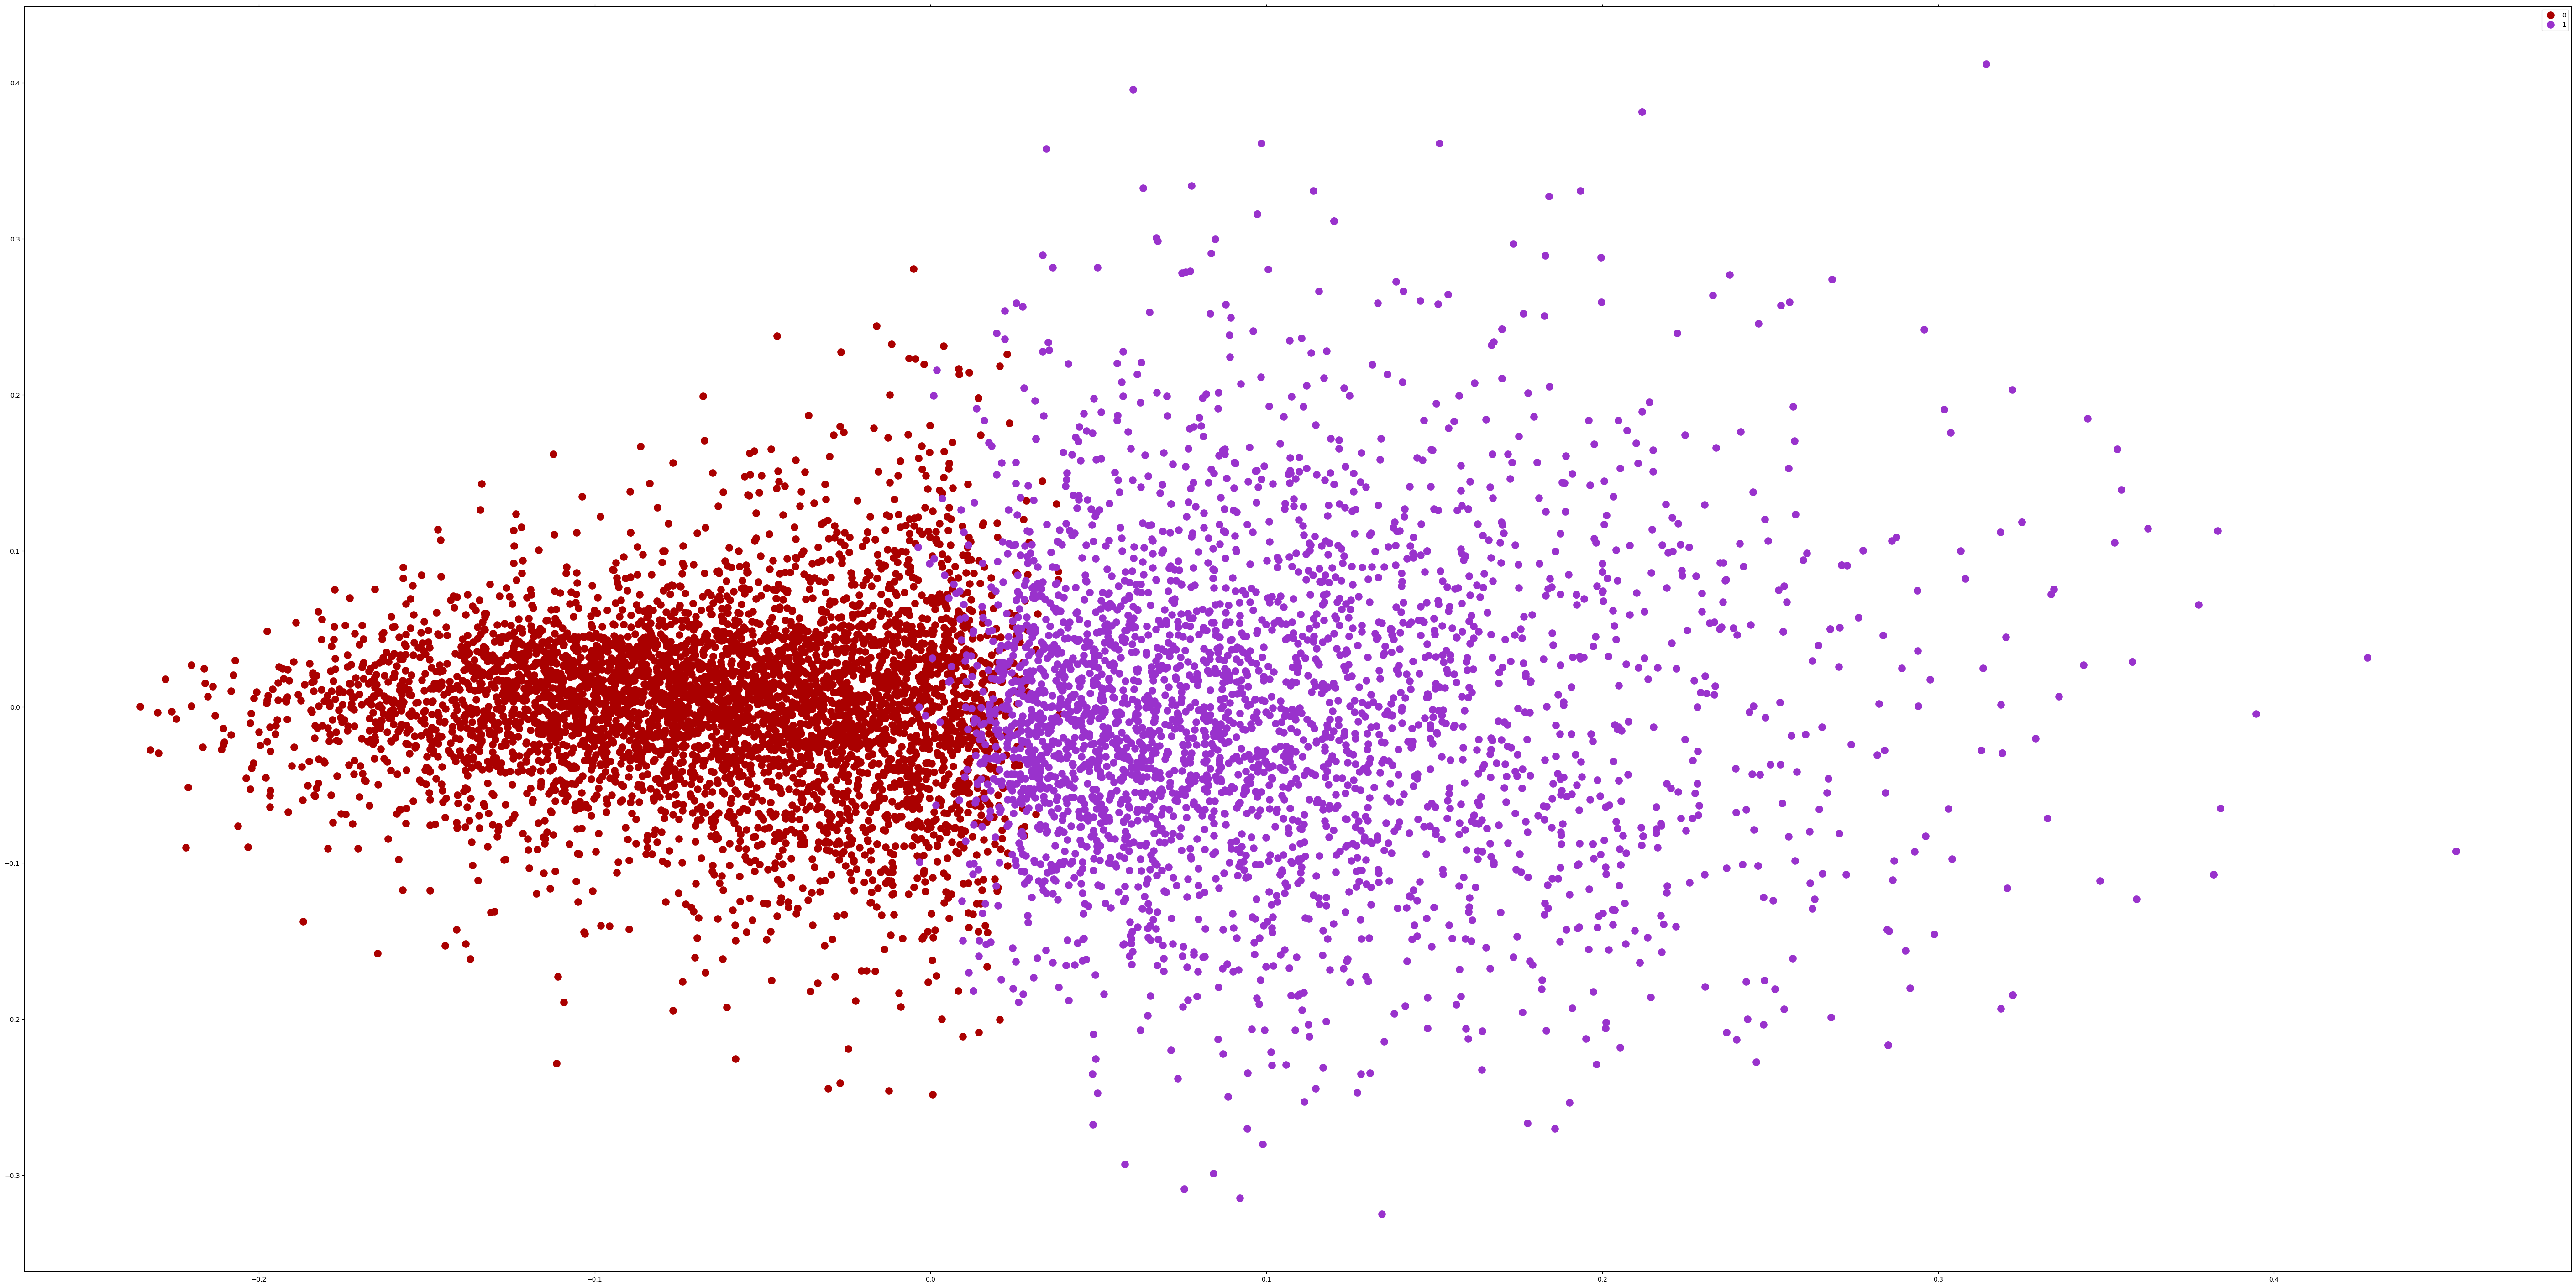

In [48]:
from matplotlib import rc
# включаем русские символы на графике
# font = {'family' : 'Verdana'}#, 'weigth': 'normal'}
# rc('font', **font)

# можно сгенерировать цвета для кластеров
import random
def generate_colors(n):
    color_list = []
    for c in range(0,n):
        r = lambda: random.randint(0,255)
        color_list.append( '#%02X%02X%02X' % (r(),r(),r()) )
    return color_list

# устанавливаем цвета
cluster_colors = {0: '#aa0000', 1: '#9932CC', 2: '#0000FF', 4:'#ffff00', 3:'#008000'}
# даем имена кластерам, но из-за рандома пусть будут просто 01234
cluster_names = {0: '0',  1: '1', 2: '2', 3:'3',4:'4'}
# matplotlib inline
# создаем data frame, который содержит координаты (из PCA) + номера кластеров и сами запросы
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters_metal, text=df_train_metal['text']))
# группируем по кластерам
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(72, 36))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off')
    ax.tick_params(        axis= 'y',
        which='both',
        left='off',
        top='off',
        labelleft='off')

ax.legend(numpoints=1)  # показать легенду только 1 точки

# добавляем метки/названия в х,у позиции с поисковым запросом
# for i in range(len(df)):
#    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=6)

# показать график
plt.show()
plt.close()